In [1]:
import numpy as np
import astropy.io.fits as fits
import astropy.units as u
from IPython.display import clear_output
import time

from scipy.ndimage import rotate
from scipy.interpolate import RegularGridInterpolator
import h5py
import os
from pathlib import Path

import misc

# data_dir = Path('C:/Users/Kian/Documents/data-files/disk-processing')
# data_dir = Path('/users/kianmilani/Documents/data-files/disk-processing')
data_dir = Path('/groups/douglase/kians-data-files/disk-processing')

wavelength_c = 575e-9*u.m
D = 2.3631*u.m
mas_per_lamD = (wavelength_c/D*u.radian).to(u.mas)

# define desired PSF dimensions and pixelscale in units of lambda/D
npsf = 256                   # output image dimension (must be power of 2)
psf_pixelscale_lamD = 0.1    # output sampling in lam0/D
psf_pixelscale_mas = psf_pixelscale_lamD*mas_per_lamD

# define the offsets in lambda/D for which the PSFs will be created
start = 0
stop = 11
step = 0.05
offsets_lamD = np.arange(start,stop+step,step)
offsets_mas = offsets_lamD*mas_per_lamD
print(offsets_mas[-1])

polaxis = 1

552.0819683944327 mas


# Setup the interpolation function

In [2]:
psfs_fpath = data_dir/'psfs'/'hlc_band1_polaxis{:d}.fits'.format(polaxis)
psfs = fits.getdata(psfs_fpath)
psfs = np.moveaxis(psfs,0,-1)

# setup the interpolating functions
x = range(npsf)
y = range(npsf)
z = offsets_mas
interpfun = RegularGridInterpolator((x, y, z), psfs, method='nearest', bounds_error=False, fill_value=0)

# Test the interpolating function

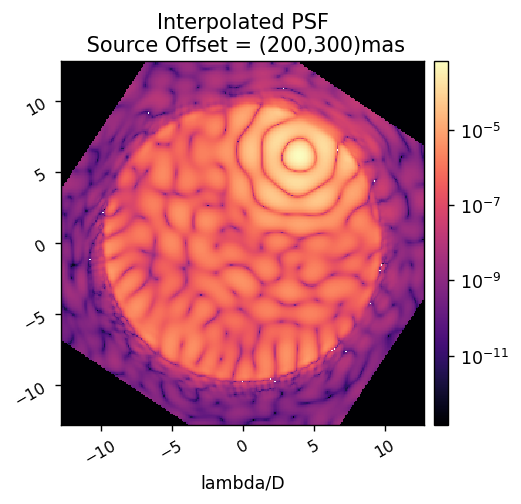

In [3]:
def find_closest_psf(xoff, yoff, interpfun, n):
    r = np.sqrt(xoff**2+yoff**2)
    theta = np.arctan2(yoff,xoff).to(u.deg)

    grid = np.meshgrid(range(n),range(n))
    flattened_grid = np.vstack([grid[0].flatten(),grid[1].flatten()])
    pts = np.vstack([ flattened_grid, r.value*np.ones(len(grid[0].flatten())) ]).T

    interpped = interpfun(pts).reshape(n,n).T
    interpped = rotate(interpped,-theta.value, reshape=False, order=3)
    return interpped

xoff = 200*u.milliarcsecond
yoff = 300*u.milliarcsecond
interpped_psf = find_closest_psf(xoff, yoff, interpfun, npsf)
misc.myimshow(interpped_psf, 'Interpolated PSF\n Source Offset = ({:.0f},{:.0f})mas'.format(xoff.value,yoff.value), 
              pxscl=psf_pixelscale_lamD, lognorm=True)

In [4]:
iwa = 2.8
owa = 9.7

sampling1 = 0.2
offsets1 = np.arange(0,iwa+1,sampling1)
# print(offsets1)

sampling2 = 1
offsets2 = np.arange(iwa+1,owa,sampling2)
# print(offsets2)

sampling3 = 2
offsets3 = np.arange(owa,15+sampling3,sampling3)
# print(offsets3)

r_offsets = np.hstack([offsets1, offsets2, offsets3])
r_offsets_mas = r_offsets*mas_per_lamD
print(r_offsets.shape, r_offsets_mas)

sampling_theta = 30
thetas = np.arange(0,360,sampling_theta)*u.deg
print(thetas.shape, thetas)
print(29*12)

(29,) [  0.          10.03785397  20.07570794  30.11356191  40.15141588
  50.18926985  60.22712382  70.2649778   80.30283177  90.34068574
 100.37853971 110.41639368 120.45424765 130.49210162 140.52995559
 150.56780956 160.60566353 170.6435175  180.68137147 190.71922545
 240.9084953  291.09776515 341.28703501 391.47630486 441.66557472
 486.83591758 587.21445729 687.592997   787.97153671] mas
(12,) [  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330.] deg
348


(337, 256, 256)
0, 0.00 mas, 0.00 mas, 0.00 mas, 0.00 deg


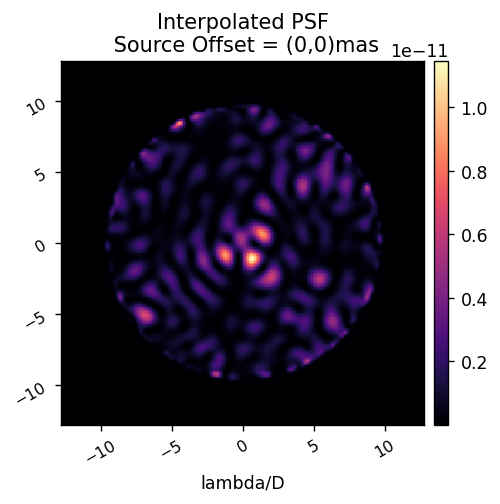

1, 10.04 mas, 0.00 mas, 10.04 mas, 0.00 deg
2, 8.69 mas, 5.02 mas, 10.04 mas, 30.00 deg
3, 5.02 mas, 8.69 mas, 10.04 mas, 60.00 deg
4, 0.00 mas, 10.04 mas, 10.04 mas, 90.00 deg
5, -5.02 mas, 8.69 mas, 10.04 mas, 120.00 deg
6, -8.69 mas, 5.02 mas, 10.04 mas, 150.00 deg
7, -10.04 mas, 0.00 mas, 10.04 mas, 180.00 deg
8, -8.69 mas, -5.02 mas, 10.04 mas, 210.00 deg
9, -5.02 mas, -8.69 mas, 10.04 mas, 240.00 deg
10, -0.00 mas, -10.04 mas, 10.04 mas, 270.00 deg
11, 5.02 mas, -8.69 mas, 10.04 mas, 300.00 deg
12, 8.69 mas, -5.02 mas, 10.04 mas, 330.00 deg
13, 20.08 mas, 0.00 mas, 20.08 mas, 0.00 deg
14, 17.39 mas, 10.04 mas, 20.08 mas, 30.00 deg
15, 10.04 mas, 17.39 mas, 20.08 mas, 60.00 deg
16, 0.00 mas, 20.08 mas, 20.08 mas, 90.00 deg
17, -10.04 mas, 17.39 mas, 20.08 mas, 120.00 deg
18, -17.39 mas, 10.04 mas, 20.08 mas, 150.00 deg
19, -20.08 mas, 0.00 mas, 20.08 mas, 180.00 deg
20, -17.39 mas, -10.04 mas, 20.08 mas, 210.00 deg
21, -10.04 mas, -17.39 mas, 20.08 mas, 240.00 deg
22, -0.00 mas, -

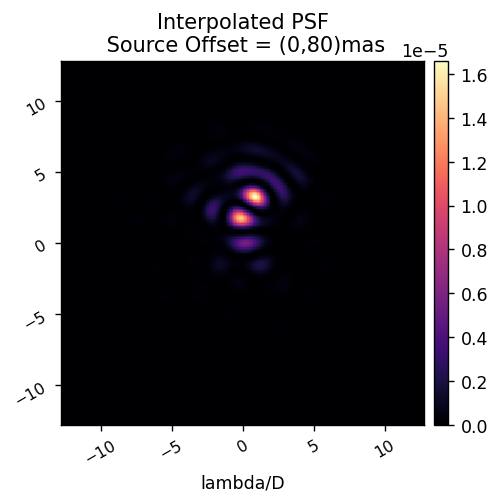

89, -40.15 mas, 69.54 mas, 80.30 mas, 120.00 deg
90, -69.54 mas, 40.15 mas, 80.30 mas, 150.00 deg
91, -80.30 mas, 0.00 mas, 80.30 mas, 180.00 deg
92, -69.54 mas, -40.15 mas, 80.30 mas, 210.00 deg
93, -40.15 mas, -69.54 mas, 80.30 mas, 240.00 deg
94, -0.00 mas, -80.30 mas, 80.30 mas, 270.00 deg
95, 40.15 mas, -69.54 mas, 80.30 mas, 300.00 deg
96, 69.54 mas, -40.15 mas, 80.30 mas, 330.00 deg
97, 90.34 mas, 0.00 mas, 90.34 mas, 0.00 deg
98, 78.24 mas, 45.17 mas, 90.34 mas, 30.00 deg
99, 45.17 mas, 78.24 mas, 90.34 mas, 60.00 deg
100, 0.00 mas, 90.34 mas, 90.34 mas, 90.00 deg
101, -45.17 mas, 78.24 mas, 90.34 mas, 120.00 deg
102, -78.24 mas, 45.17 mas, 90.34 mas, 150.00 deg
103, -90.34 mas, 0.00 mas, 90.34 mas, 180.00 deg
104, -78.24 mas, -45.17 mas, 90.34 mas, 210.00 deg
105, -45.17 mas, -78.24 mas, 90.34 mas, 240.00 deg
106, -0.00 mas, -90.34 mas, 90.34 mas, 270.00 deg
107, 45.17 mas, -78.24 mas, 90.34 mas, 300.00 deg
108, 78.24 mas, -45.17 mas, 90.34 mas, 330.00 deg
109, 100.38 mas, 0.0

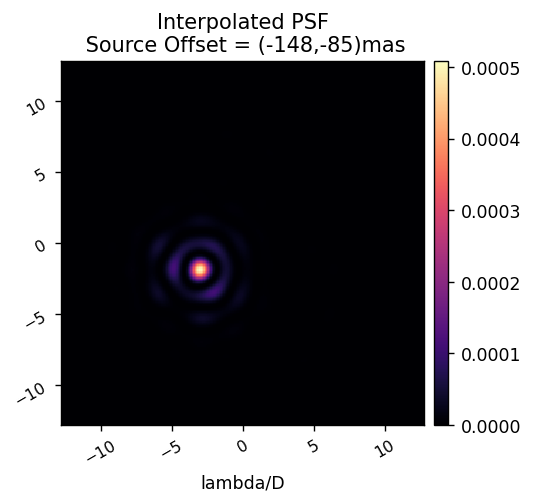

201, -85.32 mas, -147.78 mas, 170.64 mas, 240.00 deg
202, -0.00 mas, -170.64 mas, 170.64 mas, 270.00 deg
203, 85.32 mas, -147.78 mas, 170.64 mas, 300.00 deg
204, 147.78 mas, -85.32 mas, 170.64 mas, 330.00 deg
205, 180.68 mas, 0.00 mas, 180.68 mas, 0.00 deg
206, 156.47 mas, 90.34 mas, 180.68 mas, 30.00 deg
207, 90.34 mas, 156.47 mas, 180.68 mas, 60.00 deg
208, 0.00 mas, 180.68 mas, 180.68 mas, 90.00 deg
209, -90.34 mas, 156.47 mas, 180.68 mas, 120.00 deg
210, -156.47 mas, 90.34 mas, 180.68 mas, 150.00 deg
211, -180.68 mas, 0.00 mas, 180.68 mas, 180.00 deg
212, -156.47 mas, -90.34 mas, 180.68 mas, 210.00 deg
213, -90.34 mas, -156.47 mas, 180.68 mas, 240.00 deg
214, -0.00 mas, -180.68 mas, 180.68 mas, 270.00 deg
215, 90.34 mas, -156.47 mas, 180.68 mas, 300.00 deg
216, 156.47 mas, -90.34 mas, 180.68 mas, 330.00 deg
217, 190.72 mas, 0.00 mas, 190.72 mas, 0.00 deg
218, 165.17 mas, 95.36 mas, 190.72 mas, 30.00 deg
219, 95.36 mas, 165.17 mas, 190.72 mas, 60.00 deg
220, 0.00 mas, 190.72 mas, 19

In [12]:
new_psfs = np.zeros(( (len(r_offsets_mas)-1)*len(thetas) + 1, npsf,npsf))
print(new_psfs.shape)

# new_psfs = []
count = 0
for r in r_offsets_mas: 
    for th in thetas:
        xoff = r*np.cos(th)
        yoff = r*np.sin(th)
        print('{:d}, {:.2f}, {:.2f}, {:.2f}, {:.2f}'.format(count, xoff, yoff, r, th))
        
        interpped_psf = find_closest_psf(xoff, yoff, interpfun, npsf)
        
        if count==0 or count==88 or count==200 or count==340:
            misc.myimshow(interpped_psf, 
                          'Interpolated PSF\n Source Offset = ({:.0f},{:.0f})mas'.format(xoff.value,yoff.value), 
                          pxscl=psf_pixelscale_lamD)
        new_psfs[count] = interpped_psf
#         new_psfs.append(interpped_psf)
        count+=1
        if r < r_offsets_mas[1]: break

In [19]:
new_psfs.shape

(337, 256, 256)

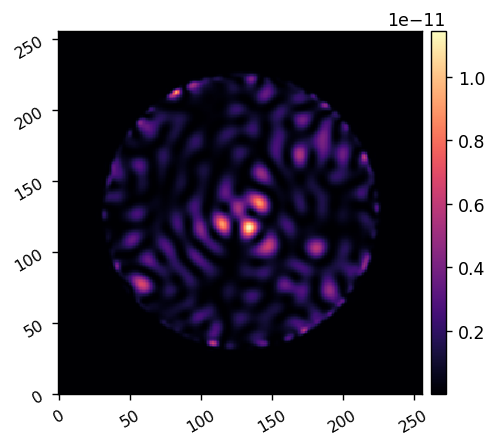

In [16]:
misc.myimshow(new_psfs[0],lognorm=False)

In [20]:
def find_closest_rtheta(xoff, yoff):
    r = np.sqrt(xoff**2+yoff**2)
    theta = np.arctan2(yoff,xoff).to(u.deg)
    if theta<0: theta += 360*u.deg
        
    kr = np.argmin(np.abs(r_offsets_mas-r))
    kth = np.argmin(np.abs(thetas-theta))
    theta_diff = theta - thetas[kth] # use this to rotate the closest available PSF to the coordinate of interest
    
#     print(r, kr, r_offsets_mas[kr])
    print(theta, kth, thetas[kth], theta_diff)
    
    if kr==0: kpsf=0
    else: kpsf = kth + len(thetas)*kr
    print(kpsf)
    
    interpped_psf = rotate(new_psfs[kpsf], -theta_diff.value, reshape=False, order=3)
    
    
    return interpped_psf


190.00000000000003 deg 6 180.0 deg 10.000000000000028 deg
18

180.0 deg 6 180.0 deg 0.0 deg
18


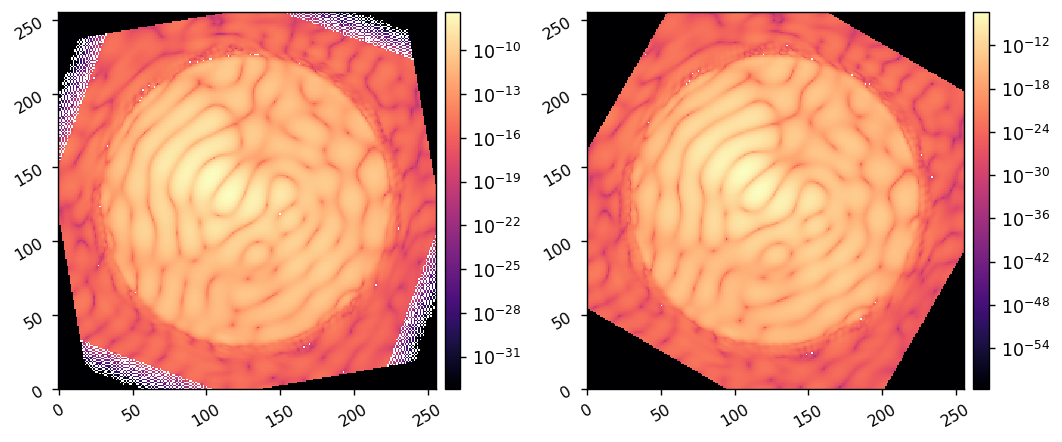

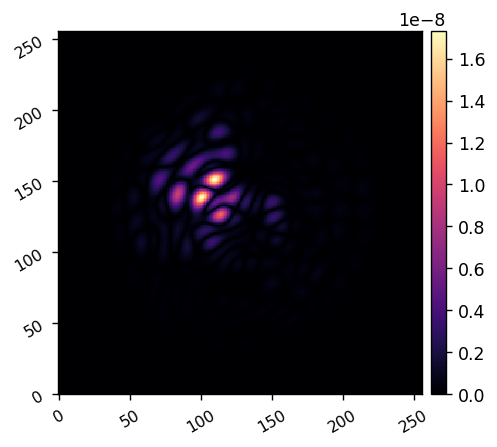

In [23]:
r = 10*u.mas

th1 = 190*u.deg
xoff1 = r*np.cos(th1)
yoff1 = r*np.sin(th1)
psf1 = find_closest_rtheta(xoff1,yoff1)

print()

th2 = 180*u.deg
xoff2 = r*np.cos(th2)
yoff2 = r*np.sin(th2)
psf2 = find_closest_rtheta(xoff2,yoff2)

misc.myimshow2(psf1, psf2, lognorm1=True, lognorm2=True)
misc.myimshow(np.abs(psf1-psf2), )

300.0 mas 21 291.09776515342816 mas
29.999999999999996 deg 1 30.0 deg -3.552713678800501e-15 deg
274
300.0 mas 21 291.09776515342816 mas
59.99999999999999 deg 2 60.0 deg -7.105427357601002e-15 deg
275


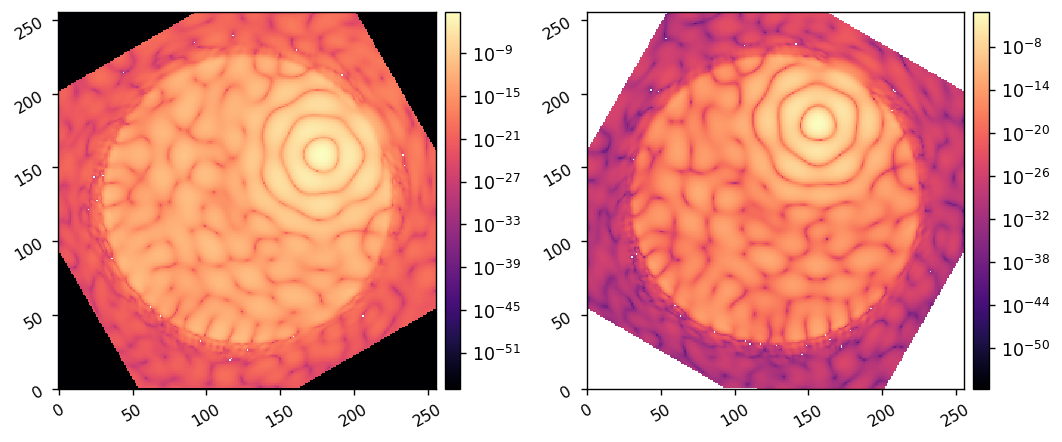

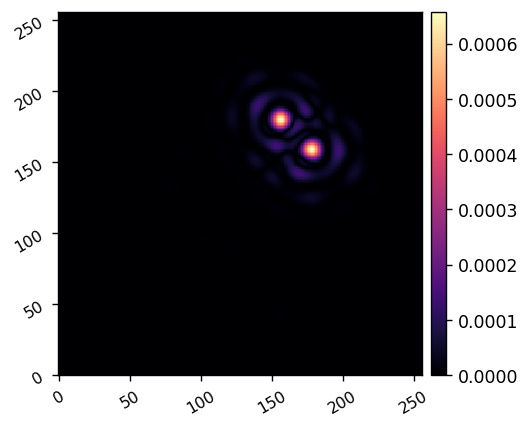

In [39]:
r = 300*u.mas

th1 = 30*u.deg
xoff1 = r*np.cos(th1)
yoff1 = r*np.sin(th1)
psf1 = find_closest_rtheta(xoff1,yoff1)

th2 = 60*u.deg
xoff2 = r*np.cos(th2)
yoff2 = r*np.sin(th2)
psf2 = find_closest_rtheta(xoff2,yoff2)

misc.myimshow2(psf1, psf2, lognorm1=True, lognorm2=True)
misc.myimshow(np.abs(psf1-psf2), )

# Create the grid for which the interpolated PSFs will be calculated

In [5]:
ndisk = 100
disk_pixelscale_mas = 20.8*u.mas/u.pix

x,y = np.meshgrid(np.arange(-ndisk/2,ndisk/2),np.arange(-ndisk/2,ndisk/2)) # 256by256 grid
x = (x+1/2).flatten()*disk_pixelscale_mas
y = (y+1/2).flatten()*disk_pixelscale_mas

In [6]:
ncols = ndisk**2
ipsf_matrix = np.zeros((npsf**2, ncols))

start=time.time()
for i in range(ncols):
    ipsf = find_closest_psf(x[i], y[i], interpfun, npsf)
    ipsf_matrix[:,i] = ipsf.flatten() # assign the flattened psf to the column
    if i==ncols/4 or i==ncols/2 or i==ncols*3/4 or i==ncols-1:
        clear_output()
        print(i, time.time()-start)

9999 152.6516628265381


In [7]:
ipsf_matrix.shape

(65536, 10000)

In [9]:
ipsf_fpath = data_dir/'ipsfs'/'ipsf_matrix_band1_polaxis{:d}.hdf5'.format(polaxis)
f = h5py.File(ipsf_fpath,'w')
f.create_dataset('ipsf_matrix', data=ipsf_matrix)
f.close()